In [ ]:
!wget https://he-s3.s3.ap-southeast-1.amazonaws.com/media/hackathon/ia-for-ai/audio-files-6-757eba7a/dbb3bd26ead211eb.zip

--2021-08-25 17:53:25--  https://he-s3.s3.ap-southeast-1.amazonaws.com/media/hackathon/ia-for-ai/audio-files-6-757eba7a/dbb3bd26ead211eb.zip
Resolving he-s3.s3.ap-southeast-1.amazonaws.com (he-s3.s3.ap-southeast-1.amazonaws.com)... 52.219.124.39
Connecting to he-s3.s3.ap-southeast-1.amazonaws.com (he-s3.s3.ap-southeast-1.amazonaws.com)|52.219.124.39|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 435471753 (415M) [application/zip]
Saving to: ‘dbb3bd26ead211eb.zip’

dbb3bd26ead211eb.zi 100%[===================>] 415.30M  14.4MB/s    in 32s     

2021-08-25 17:53:58 (12.9 MB/s) - ‘dbb3bd26ead211eb.zip’ saved [435471753/435471753]



In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("/content/dbb3bd26ead211eb.zip", 'r')
zip_ref.extractall("/content")
zip_ref.close()

In [ ]:
import numpy as np
import pandas as pd
import librosa, librosa.display
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Training data/train.csv')

In [ ]:
train.head()

,Unnamed: 0,filename,emotion,durations
0,0,18777.mp3,neutral,2.44000
1,1,24041.mp3,neutral,3.36000
2,2,1621.mp3,joy,0.34068
3,3,28883.mp3,neutral,1.56000
4,4,14918.mp3,neutral,2.82000


In [ ]:
n_fft = 2048
hop_length = 256

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


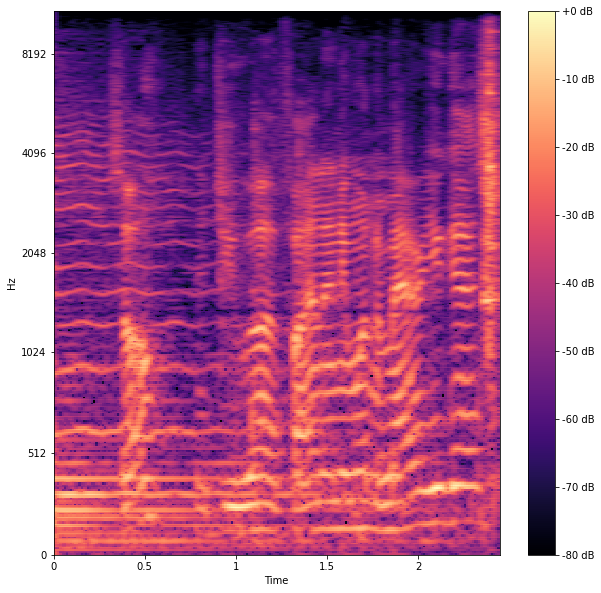

In [ ]:
signal, sample_rate = librosa.load("/content/dataset/TrainAudioFiles/18777.mp3")
S = librosa.feature.melspectrogram(signal, sr=sample_rate, n_fft=n_fft, hop_length=hop_length, n_mels=512)
S_DB = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(10,10))
librosa.display.specshow(S_DB, sr=sample_rate, hop_length=hop_length, x_axis='time', y_axis='mel');
plt.colorbar(format='%+2.0f dB');

In [ ]:
lessthan = train[train['durations']<2]

In [ ]:
lessthan

,Unnamed: 0,filename,emotion,durations
2,2,1621.mp3,joy,0.340680
3,3,28883.mp3,neutral,1.560000
8,8,28471.mp3,surprise,0.840000
9,9,1459.mp3,neutral,1.650023
10,10,6829.mp3,joy,1.940000
...,...,...,...,...
5804,5804,2222.mp3,surprise,1.900000
5805,5805,2410.mp3,surprise,1.750023
5811,5811,6688.mp3,neutral,1.310023
5813,5813,2066.mp3,neutral,0.140000
